In [274]:
import torch
import random
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [275]:



x_train_simple = []
y_train_simple = []

a = []


def read_matrix(l):
    matrix22 = []
    input_matrix = []

    with open(f'D:\\my_pyhton_projects\\nn_sarov\\matrix\\file_matrix{l}.txt') as f:
        for i in range(10):
            for j in range(3):
                input_matrix += map(float, f.readline().replace('[', '').replace(']','').replace('\n', '').split())
            matrix22.append(input_matrix)
            input_matrix = []
    return matrix22


for i in range(1, 65537):
    a.append(read_matrix(i))
    if i % 6555 == 0:
        print(i//655, '%')

b = torch.tensor(a)


x_train = b


10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %


In [3]:
x_train.size()

torch.Size([65536, 10, 10])

In [187]:
def read_phases(l):

    phases2 = []
    with open(f'D:\\my_pyhton_projects\\nn_sarov\\Y_train3\\delta_phases{l}.txt') as f:
        phases = f.readline().replace('[', '').replace(']','').replace('\n', '').replace(',', '').split()
        
    for i in range(4):
        phases2.append(float(phases[i]))
        
    return phases2

a2 = []

for i in range(1, 65537):
    a2.append(read_phases(i))
    if i % 6555 == 0:
        print(i//655, '%')


b2 = torch.tensor(a2)


y_train = b2



10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %


In [188]:
y_train.size()

torch.Size([65536, 4])

In [ ]:
#ансквизим выборки

In [ ]:
# x_train = x_train.unsqueeze(1).float()

In [189]:
len(x_train)


65536

In [190]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=3, padding=1)
        self.act1  = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=3, stride=1)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=3, padding=1)
        self.act2  = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=3, stride=1)
        
        self.fc1   = torch.nn.Linear(576, 120)
        self.act3  = torch.nn.Tanh()
        
        self.fc2   = torch.nn.Linear(120, 60)
        self.act4  = torch.nn.Tanh()
        
        
        self.fc3   = torch.nn.Linear(60, 10)
        self.act5  = torch.nn.Tanh()
        
        self.fc4   = torch.nn.Linear(10, 4)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        x = self.act5(x)
        x = self.fc4(x)
        
        return x
    
lenet5 = LeNet5()

In [191]:
X_train = x_train.unsqueeze(1).float()

In [192]:
X_train.shape

torch.Size([65536, 1, 10, 10])

In [194]:

loss = nn.MSELoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-2)

In [195]:
batch_size = 100


for epoch in range(10):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        #print(X_batch)
        #print(y_batch)
        preds = lenet5.forward(X_batch) 
        #print(preds)
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 10, loss_value))
        
    

Epoch [1/10], Loss: 0.7848
Epoch [2/10], Loss: 1.1278
Epoch [3/10], Loss: 1.0373
Epoch [4/10], Loss: 1.0215
Epoch [5/10], Loss: 0.9470
Epoch [6/10], Loss: 0.8464
Epoch [7/10], Loss: 0.8841
Epoch [8/10], Loss: 0.8523
Epoch [9/10], Loss: 1.0104
Epoch [10/10], Loss: 0.8331


In [196]:
def predict(lenet5, x):
    y_pred = lenet5.forward(x)

    return y_pred

In [49]:
import matplotlib.pyplot as plt

In [ ]:
epochs = [i for i in range(100)]
plt.figure(figsize=(15, 10))
plt.plot(epochs, losses)
plt.show()

In [197]:
# предскажем fi = [[0, 0, 0, 0], [1, 2, 3, 4], [1, 2, 1, 4], [1, 2, 2, 5], [0, 2, 0, 4], [1, 1, 1, 1]]

In [198]:
def read_matrix_hui(l):
    matrix22 = []
    input_matrix = []

    with open(f'D:\\my_pyhton_projects\\nn_sarov\\X_validation\\file_matrix{l}.txt') as f:
        for i in range(10):
            for j in range(3):
                input_matrix += map(float, f.readline().replace('[', '').replace(']','').replace('\n', '').split())
            matrix22.append(input_matrix)
            input_matrix = []
    return matrix22
x_valid = torch.Tensor(read_matrix_hui(5)) #параметр считывания настроим вручную
x_valid

tensor([[4.9003e+07, 6.1595e+08, 1.8915e+10, 3.5378e+07, 2.1743e+11, 2.1743e+11,
         3.5378e+07, 1.8915e+10, 6.1595e+08, 4.9003e+07],
        [3.7981e+08, 4.7881e+09, 2.3612e+11, 5.8170e+08, 3.8718e+12, 3.8718e+12,
         5.8170e+08, 2.3612e+11, 4.7881e+09, 3.7981e+08],
        [3.1846e+09, 1.1187e+11, 8.8621e+12, 2.2373e+10, 1.4497e+14, 1.4497e+14,
         2.2373e+10, 8.8621e+12, 1.1187e+11, 3.1846e+09],
        [1.6717e+06, 2.6753e+08, 1.9181e+10, 4.3686e+07, 2.6843e+11, 2.6843e+11,
         4.3686e+07, 1.9181e+10, 2.6753e+08, 1.6717e+06],
        [1.7125e+10, 1.9678e+12, 1.2353e+14, 2.6315e+11, 1.5671e+15, 1.5671e+15,
         2.6315e+11, 1.2353e+14, 1.9678e+12, 1.7125e+10],
        [1.7125e+10, 1.9678e+12, 1.2353e+14, 2.6315e+11, 1.5671e+15, 1.5671e+15,
         2.6315e+11, 1.2353e+14, 1.9678e+12, 1.7125e+10],
        [1.6717e+06, 2.6753e+08, 1.9181e+10, 4.3686e+07, 2.6843e+11, 2.6843e+11,
         4.3686e+07, 1.9181e+10, 2.6753e+08, 1.6717e+06],
        [3.1846e+09, 1.1187

In [199]:
x_valid.shape

torch.Size([10, 10])

In [202]:
x_valid = x_valid.unsqueeze(0).float()

In [203]:
x_valid.shape

torch.Size([1, 1, 10, 10])

In [204]:
pred_hui = predict(lenet5, x_valid)
pred_hui

tensor([[-0.6045,  0.5074, -0.2842,  0.6157]], grad_fn=<AddmmBackward0>)

In [205]:
#Вывод итогового результата

In [206]:
import numpy as np
import matplotlib.pylab as plt
from math import pi, exp
import random
import torch

lmbda = 0.5e-6 # длина волны
k = 2*pi/lmbda # Волновое число
z = 4 # Расстояние от XY до UV (Тогда u, v береv в диапазоне [-0.01, 0.01]), чтобы диапазон углов был в [-5, 5]
m = k/z
E0 = 1

# Разобъём дальнюю зону на точки, в которых считаем интенсивность
x = np.linspace(-0.0009, 0.0009, 10)
y = np.linspace(-0.0009, 0.0009, 10)

In [207]:
fi1 = [1, 1, 1, 1]
fi2 = pred_hui.detach()[0].numpy() 
fi = [i + k for i, k in zip(fi2, fi1)]

print('fi1 = ', fi1, 'начальное задание фаз которые мы как будто не знаем в реальном эксперименте')
print('fi2 = ', fi2, 'генерация сдвигов фаз нейросетью')
print('fi = ', fi, 'итоговые фазы для построения')




fi1 =  [1, 1, 1, 1] начальное задание фаз которые мы как будто не знаем в реальном эксперименте
fi2 =  [-0.60452706  0.50739217 -0.28423247  0.6157032 ] генерация сдвигов фаз нейросетью
fi =  [0.3954729437828064, 1.507392168045044, 0.7157675325870514, 1.6157032251358032] итоговые фазы для построения


In [208]:
# данный алгос строит распределение по fi

# Длина стороны
a = 0.003
y20 = 1.05 * a
x2 = -1.05 * a
y10 = 0.05 * a
x1 = -0.05 * a
y2 = y20
y1 = y10
zss = 0
# xss, yss = 0.001, 0.001 
xss, yss = np.meshgrid(x, y, sparse=True)
n = 0
for i in range(2):
    for j in range(2):
        Exy = E0*(np.cos(fi[n]) + 1j*np.sin(fi[n]))
        zss += (Exy*(np.cos(k*(xss**2 +yss**2)/(2*z)) + np.sin(k*(xss*2 + yss**2)/(2*z)) * 1j)/(1j*lmbda*z) *
         (-1/(m*(xss*yss))) * (np.cos((x2*xss + y2*yss)*m) - 1j*np.sin((x2*xss + y2*yss)*m) - 
                             np.cos((x1*xss + y2*yss)*m) + 1j*np.sin((x1*xss + y2*yss)*m) -
                             np.cos((x2*xss + y1*yss)*m) + 1j*np.sin((x2*xss + y1*yss)*m) + 
                             np.cos((x1*xss + y1*yss)*m) - 1j*np.sin((x1*xss + y1*yss)*m)))
        n += 1 # Для каждой субаппертуры берем значение из списка fi
        y2 -= 1.1*a
        y1 -= 1.1*a
    x2 += 1.1*a 
    x1 += 1.1*a  
    y2 = y20
    y1 = y10
E = abs(zss)**2   

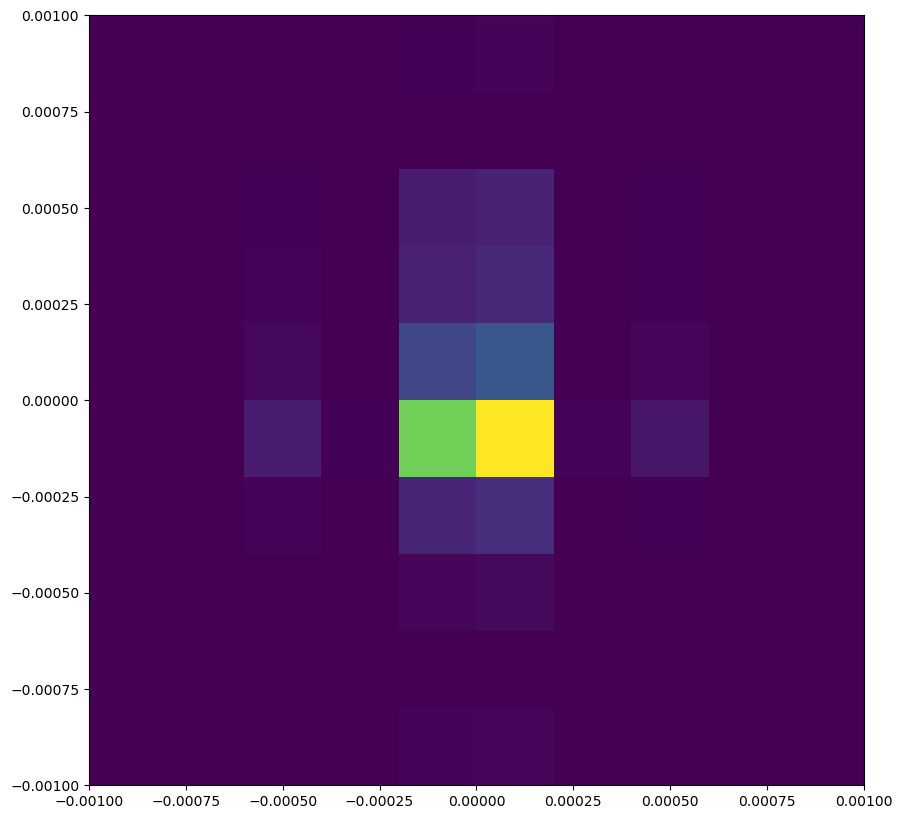

In [209]:
# вывод графика
fig, ax = plt.subplots(figsize=(10,10))
ax.pcolormesh(xss, yss, E, cmap=plt.get_cmap('viridis'))
plt.show()

In [84]:
# так же выведем изначальное распределение


In [85]:
fi = fi1

In [86]:
# Длина стороны
a = 0.003
y20 = 1.05 * a
x2 = -1.05 * a
y10 = 0.05 * a
x1 = -0.05 * a
y2 = y20
y1 = y10
zss = 0
# xss, yss = 0.001, 0.001 
xss, yss = np.meshgrid(x, y, sparse=True)
n = 0
for i in range(2):
    for j in range(2):
        Exy = E0*(np.cos(fi[n]) + 1j*np.sin(fi[n]))
        zss += (Exy*(np.cos(k*(xss**2 +yss**2)/(2*z)) + np.sin(k*(xss*2 + yss**2)/(2*z)) * 1j)/(1j*lmbda*z) *
         (-1/(m*(xss*yss))) * (np.cos((x2*xss + y2*yss)*m) - 1j*np.sin((x2*xss + y2*yss)*m) - 
                             np.cos((x1*xss + y2*yss)*m) + 1j*np.sin((x1*xss + y2*yss)*m) -
                             np.cos((x2*xss + y1*yss)*m) + 1j*np.sin((x2*xss + y1*yss)*m) + 
                             np.cos((x1*xss + y1*yss)*m) - 1j*np.sin((x1*xss + y1*yss)*m)))
        n += 1 # Для каждой субаппертуры берем значение из списка fi
        y2 -= 1.1*a
        y1 -= 1.1*a
    x2 += 1.1*a 
    x1 += 1.1*a  
    y2 = y20
    y1 = y10
E = abs(zss)**2  

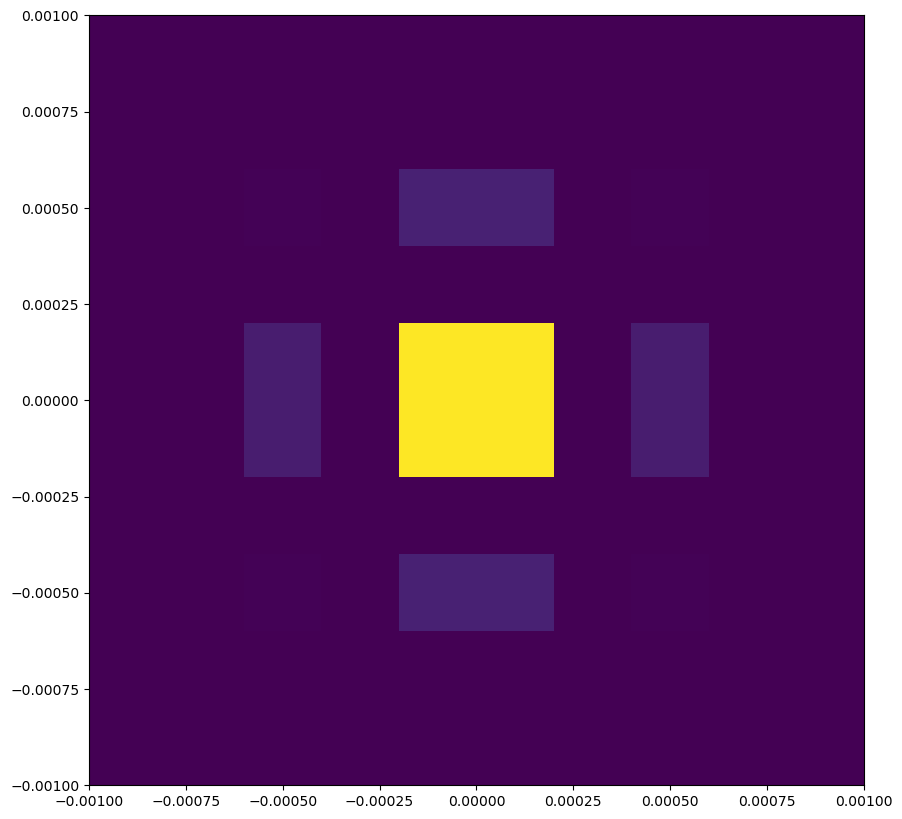

In [87]:
# вывод графика
fig, ax = plt.subplots(figsize=(10,10))
ax.pcolormesh(xss, yss, E, cmap=plt.get_cmap('viridis'))
plt.show()

In [88]:
def I_0(fi, zss = 0, a=0.003):
    for i in range(4):
        zss += E0/(1j*lmbda*z) * (a**2) * (np.cos(fi[i]) + 1j*np.sin(fi[i]))
    E = abs(zss)**2 
    return E

In [247]:
def read_matrix_10000(s):
    matrix22 = []
    input_matrix = []

    with open(f'D:\\my_pyhton_projects\\nn_sarov\\x_validation_test\\file_matrix{s}.txt') as f:
        for i in range(10):
            for j in range(3):
                input_matrix += map(float, f.readline().replace('[', '').replace(']','').replace('\n', '').split())
            matrix22.append(input_matrix)
            input_matrix = []
    return matrix22

a4 = []
for i in range(1, 10001):
    a4.append(read_matrix_10000(i))
    if i % 1000 == 0:
        print(i//100, '%')

b4 = torch.tensor(a4)


X_V = b4

10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %


In [213]:
def read_phases_10000(s):

    phases2 = []
    with open(f'D:\\my_pyhton_projects\\nn_sarov\\y_validation_test\\initial_phases{s}.txt') as f:
        phases = f.readline().replace('[', '').replace(']','').replace('\n', '').replace(',', '').split()
        
    for i in range(4):
        phases2.append(float(phases[i]))
        
    return phases2

a5 = []

for i in range(1, 10001):
    a5.append(read_phases_10000(i))
    if i % 1000 == 0:
        print(i//100, '%')


b5 = torch.tensor(a5)

Y_V = b5



10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %


In [214]:
Y_V.size()

torch.Size([10000, 4])

In [248]:
deltas  = []



In [253]:
X_V = X_V.unsqueeze(1).float() #применить 2 раза



In [254]:
X_V[1].shape

torch.Size([1, 1, 10, 10])

In [255]:
for i in range(10000):
    a = predict(lenet5, X_V[i]).detach()
    b = a.numpy()
    deltas.append(b)
    
    
                  

    

In [256]:
len(deltas)

10000

In [257]:
Initial_phases = []

In [258]:
for i in range(10000):
    a = Y_V[i].detach()
    b = a.numpy()
    Initial_phases.append(b)

In [259]:
len(Initial_phases)

10000

In [260]:
def I_0(fi, zss = 0, a=0.003):
    for i in range(4):
        zss += E0/(1j*lmbda*z) * (a**2) * (np.cos(fi[i]) + 1j*np.sin(fi[i]))
    E = abs(zss)**2 
    return E

In [261]:
I_max = I_0([0, 0, 0, 0])

In [262]:
I_max

324.0

In [263]:
Initial_Strel = []



In [264]:
for i in Initial_phases:
    Initial_Strel.append(round(I_0(i)/I_max, 2))
    


In [265]:
Initial_Strel[0]

0.13

In [266]:
cnt = 0
for i in Initial_Strel:
    if i >= 0.7:
        cnt +=1
        
cnt

563

In [267]:
Final_Strel = []
Final_phases = []

In [268]:
Final_phases = [i + k for i,k in zip(Initial_phases, deltas)]

In [269]:
Final_phases[1][0]

array([ 2.1830444, -1.7815357, -1.9968423, -1.0220554], dtype=float32)

In [270]:
for i in Final_phases:
    i = i[0]
    Final_Strel.append(round(I_0(i)/I_max, 2))
    
s = 0
for i in Final_Strel:
    if i >= 0.7:
        s +=1
        


In [271]:
len(Final_Strel)

10000

In [272]:
s

4101

<BarContainer object of 10 artists>

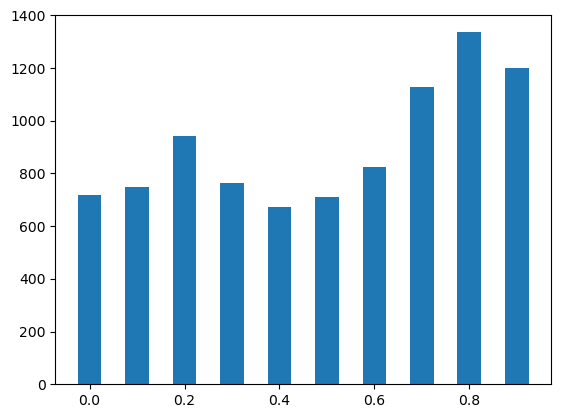

In [273]:
S = []
I = np.arange(10)/10

for i in range(10):
    i = i / 10
    
    s = 0
    for k in Final_Strel:
        if  ( i < k < 0.1+i)  :
            s +=1
            
    S.append(s)
    #print(i, i+0.1, s)
plt.bar(I, S, width = 0.05)
            
    
    

In [241]:
S

[719, 750, 943, 765, 674, 712, 825, 1128, 1336, 1202]

<BarContainer object of 10 artists>

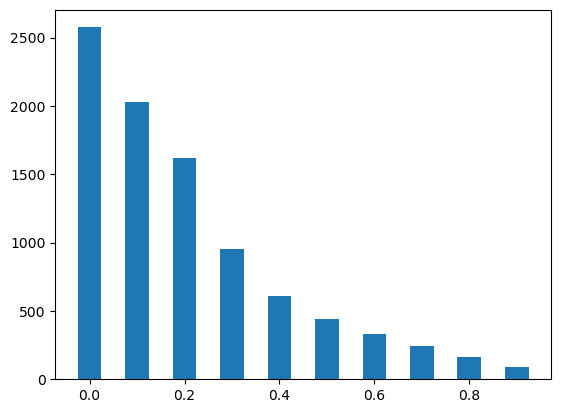

In [182]:
S = []
I = np.arange(10)/10

for i in range(10):
    i = i / 10
    
    s = 0
    for k in Initial_Strel:
        if  ( i < k < 0.1+i)  :
            s +=1
            
    S.append(s)
    #print(i, i+0.1, s)
    
plt.bar(I, S, width = 0.05)

In [ ]:
S